# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

# Your solution is here
* Prove
$$(AXB)_{il} = \sum_{j,k}a_{ij}x_{jk}b_{kl}=p_{il}$$
$$vec(AXB)=[p_{*1},p_{*2},....]$$


$$row_1(B^T \otimes A)=\sum_i b_{i1}A$$
$$vec(X) = [x_{*1},x_{*2},...,x_{*n}]$$ where $x_{*n}$ is nth column of x
$$row_1(B^T \otimes A)vec(X) = \sum_i b_{i1}A x_{*i} = \sum_{i} b_{i1}a_{p*} x_{*i} = \sum_{il} a_{pl} x_{li}b_{i1} = c_{p,1}$$
$$row_2(B^T \otimes A)vec(X) = \sum_{i} a_{p*} x_{*i}b_{i2} = c_{p,2}$$
$$...$$
$$(B^T \otimes A)vec(X) = [c_{*,1},c_{*,2},...]$$
as you can see, if change order of indexes
$$c_{p,t} = \sum_{il} a_{pl} x_{li}b_{it} = p_{il} =\sum_{j,k}a_{ij}x_{jk}b_{kl}$$
therefore:
$$vec(AXB)=(B^T \otimes A)vec(X)$$

* Let's $ x = vec(C)$ , C is such that can rewrite our eq:$(A \otimes B) x = (A \otimes B) vec(C) = vec(BCA^T)$

$(BC)_{ik} = (\sum_j b_{ij} c_{jk})$ - J mult's, J - 1 summations => $(B_{IJ}C_{JK}) => IK (J + J -1)= IK (2J -1)$ operations
$$BC = P$$
$P_{IK} (A^T)_{KL} =>IL(2K-1)$operations
Total $IL(2K-1) + IK (2J -1)$ operations so Complexity $O(2IKJ + 2ILK)$ For $B_{IJ}C_{JK}(A^T)_{KL}$



* $A \otimes (B + C) = (A \otimes B) + (A \otimes C)$ ; $(A \otimes B)(C \otimes D) = AC \otimes BD$

Consider:

$$
(S_A^{-1} \otimes S_B^{-1}) (A \otimes I + I \otimes B) (S_A \otimes S_B) = (S_A^{-1} \otimes S_B^{-1}) (A \otimes I) (S_A \otimes S_B) + (S_A^{-1} \otimes S_B^{-1}) (I \otimes B) (S_A \otimes S_B) =  $$

$$ = S_A^{-1} A S_A \otimes S^{-1}_B I S_B + S_A^{-1} I S_A \otimes S_B^{-1} B S_B =  \Lambda_A \otimes I + I \otimes \Lambda_B $$


e-vals: $\Lambda_A \otimes I + I \otimes \Lambda_B $
e-vec: $(S_A^{-1} \otimes S_B^{-1})$

* Richardson iterations


$$q = \frac{\lambda_{max}-\lambda_{min}}{\lambda_{max}+\lambda_{min}} $$
$$\frac{1000-\frac{1}{1000}}{1000+\frac{1}{1000}}$$
$$=  \frac{1000000 - 1}{1000000 + 1} = \frac{999999}{1000001}= 0.999998000002$$ 
$$k \geq \frac{-4}{\log 0.999998000002} $$ 

$k \geq 4605170 $

In [311]:
import numpy as np
-4/np.log10((1e+6-1)/(1e+6+1))

4605170.186012501

* Chebishev


$$q = \frac{\sqrt{cond A}-1}{\sqrt{cond A}+1},  condA = \frac{\lambda_{max}}{\lambda_{min}} = \frac{1000}{\frac{1}{1000}}= 10^6$$

 $$ q = \frac{10^3 - 1}{10^3+1} = 0.998002$$

$$\varepsilon_k \leq C q^{k-1} \varepsilon_0$$
$$ \log{\varepsilon_k} \leq \log{C} +  \log{q^{k-1}} + \log{\varepsilon_0}$$
$$ (k-1)\log q \geq \log \varepsilon_k - \log C - \log \varepsilon_0 $$
 

$$suppose C ,\varepsilon_0 are small $$

$$ (k-1) \log 0.998002 \geq -4 $$
$$ k \geq \frac{-4}{ \log 0.998002} +1$$
$ k \geq 4605 $


In [310]:
import numpy as np
-4/np.log10((1e+3-1)/(1e+3+1))

4605.168650930854

* Conjugate gradient method
$$q^k = \gamma (\frac{\sqrt{cond A}-1}{\sqrt{cond A}+1})^k = 2 (\frac{10^3 - 1}{10^3 + 1})^k  $$
$$ \log(2 \Big( \frac{999}{1001} \Big)^k ) \geq -4 $$

$$ \log 2 + k \log(\frac{999}{1001})  \geq -4 $$

$$k \geq \frac{-4 \log 2}{\log_(\frac{999}{1001})}  = 4952$$



In [323]:
import numpy as np
import scipy 
import scipy.sparse
import scipy.sparse.linalg
import scipy
from scipy.sparse import csc_matrix
aa = np.array([(1/1000)*i for i in range(1,1001)])
a = np.concatenate((aa,np.array([1000])), axis=0)
A = scipy.sparse.spdiags(a,0, len(a), len(a), 'csr')
tau = 2.0/(1e+3 + 1e-3)


In [331]:
iters = np.ones(len(a))
num_iters = 4605170
x = np.zeros(len(a))
richardson_res = []
for i in range(num_iters):
    res = A @ x - iters
    x = x - tau * res
    richardson_res.append(np.linalg.norm(res))

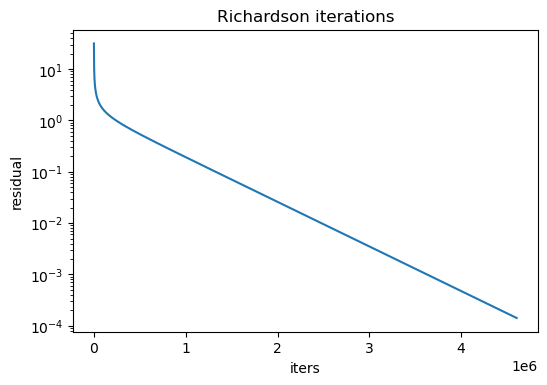

In [332]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(dpi=100)
plt.plot(richardson_res)
plt.title('Richardson iterations')
plt.xlabel('iters')
plt.ylabel('residual')
plt.yscale('log')

In [347]:
num_iters = 4096
roots = [np.cos((np.pi * (2 * i + 1)) / (2 * num_iters)) for i in range(num_iters)]
taus = [(a.max() + a.min() - (a.min() - a.max()) * r) / 2 for r in roots]
x = np.zeros(A.shape[1])
result = A @ x - np.ones(A.shape[1])
norms = [np.linalg.norm(result)]

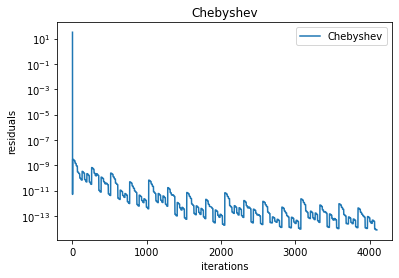

In [366]:
def shuffle(n):
    if n == 1:
        return np.array([0,], dtype=int)
    else:
        prev = shuffle(n // 2)
        ans = np.zeros(n, dtype=int)
        ans[::2] = prev
        ans[1::2] = n - 1 - prev
        return ans

good_perm_even = shuffle(num_iters)
    

for i in range(num_iters):
    x = x - 1.0/taus[good_perm_even[i] - 1]  * result
    result = A.dot(x) -  np.ones(A.shape[1])
    norms.append(np.linalg.norm(result))
    
plt.semilogy(norms, label="Chebyshev")
plt.legend()
plt.xlabel("iterations")
plt.ylabel("residuals")
plt.title('Chebyshev')
plt.show()

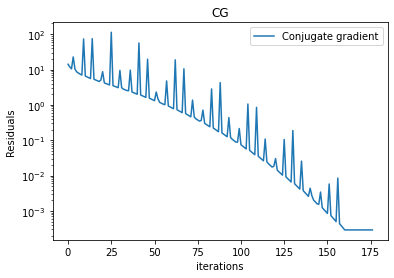

In [374]:
x = scipy.sparse.linalg.cg(A, np.ones(len(a)), x0=np.zeros(len(a)), maxiter=10)
norms = []
for i in range (180):
    x = scipy.sparse.linalg.cg(A, np.ones(len(a)), x0=np.zeros(len(a)), maxiter=i)
    result = A @ (x[0]) - np.ones(A.shape[1])
    norms.append(np.linalg.norm(result))

plt.semilogy(norms[3:], label="Conjugate gradient")

plt.legend()
plt.xlabel("iterations")
plt.ylabel("Residuals ")
plt.title("CG")
plt.show()


## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(330, 330)

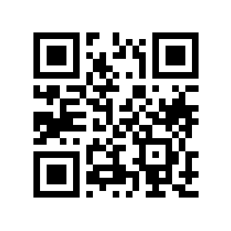

In [133]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")
x.shape

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [234]:
import numpy as np
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from scipy import misc
import imageio
import scipy.sparse.linalg as spla


def T_matvec_2(x, alpha):
    
    n = x.shape[0]
    a = alpha
    
    T = np.zeros((n*2 -1,n*2-1 ))
    for i1 in range(1,n+1):
        for j1 in range(1,n+1):
            for i2 in range(1,n+1):
                for j2 in range(1,n+1):
                    T[i1 - j1,i2 - j2]= a/np.pi* np.exp(-a*((i1-j1)**2+(i2-j2)**2)) 
    x_resised = np.zeros((n*2 -1,n*2-1 ))
    x_resised[:n,:n] = x
    blured = np.fft.ifft2(np.multiply(np.fft.fft2(T),np.fft.fft2(x_resised)))
    
    
    return np.real(blured)[:n,:n]



def T_matvec(x, alpha):
    n = x.shape[0]
    n =int(np.sqrt(n))
    x =x.reshape((n,n))
    a = alpha
    
    T = np.zeros((n*2 -1,n*2-1 ))
    for i in range(0,n):
        for j in range(0,n):
            T[i,j]= a/np.pi* np.exp(-a*((i)**2+(j)**2)) 
        for j in range(-1,-n,-1):
            T[i,j]= a/np.pi* np.exp(-a*((i)**2+(j)**2)) 
            

    for i in range(-1,-n,-1):
        for j in range(0,n):
            T[i,j]= a/np.pi* np.exp(-a*((i)**2+(j)**2)) 
        for j in range(-1,-n,-1):
            T[i,j]= a/np.pi* np.exp(-a*((i)**2+(j)**2)) 
            

    x_resised = np.zeros((n*2 -1,n*2-1 ))
    x_resised[:n,:n] = x
    blured = np.fft.ifft2(np.multiply(np.fft.fft2(T),np.fft.fft2(x_resised)))
    blured = np.real(blured)[:n,:n]
    
    
    return blured.reshape(n**2)

# your code is here

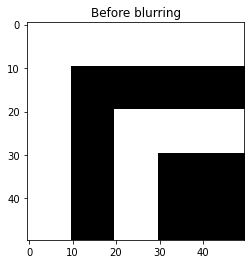

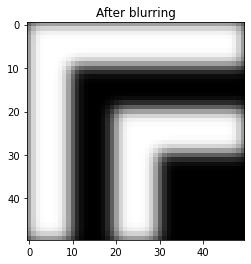

In [135]:
data = x[30:80,30:80]
blurred = T_matvec_2(data,0.2)
plt.imshow(data,cmap='gray')
plt.title("Before blurring")
plt.show()
plt.imshow(blurred,cmap='gray')
plt.title("After blurring")
plt.show()

In [136]:
alpha = 0.5
n = 9
T = spla.LinearOperator((n,n),matvec = lambda x :T_matvec(x, 0.5))

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

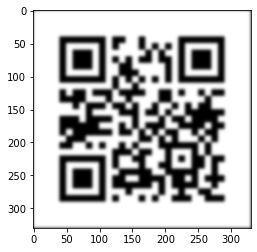

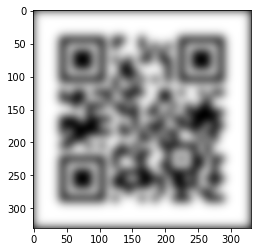

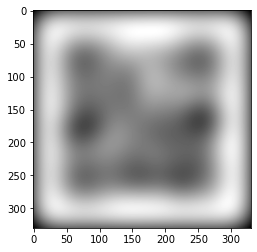

In [236]:
data = x
n = data.shape[0]
data = data.reshape(n**2)
alphas = [0.1,0.01,0.001]

y_ar = []
for a in alphas:
    
    T = spla.LinearOperator((n**2,n**2),matvec = lambda x :T_matvec(x, a))
    
    y = T * data
    y_ar.append(y)
    y = y.reshape((n,n))
    
    plt.imshow(y,cmap='gray')
    plt.show()
    

In [274]:
import scipy 
tols = [1e-3,1e-4,1e-5,1e-6,1e-7]
def call(i,j):
    iters[i,j] = iters[i,j] +1

sols = [[1]*5]*3
iters =np.zeros((3,5))
for i in range(3):
    for j in range(5):
        T = spla.LinearOperator((n**2,n**2),matvec = lambda x :T_matvec(x, alphas[i]))
        sols[i][j] = scipy.sparse.linalg.cg(T,y_ar[i],tol= tols[j],maxiter=20, callback=lambda vk: call(i,j))
    print("good")
        


good
good
good


In [291]:
print(r"Alpha","  ","iterations", "  ", "error","      tolerance")
for i in range(3):
    for j in range(5):
        sol = sols[i][j][0]
        er = np.linalg.norm(data - sol)/np.linalg.norm(data)
        print(alphas[i],"  ", iters[i,j], "  ", er,tols[j])



Alpha    iterations    error       tolerance
0.1    11.0    0.43627179661633697 0.001
0.1    20.0    0.4312983322193552 0.0001
0.1    20.0    0.4312983322193552 1e-05
0.1    20.0    0.4312983322193552 1e-06
0.1    20.0    0.4312983322193552 1e-07
0.01    18.0    0.43627179661633697 0.001
0.01    20.0    0.4312983322193552 0.0001
0.01    20.0    0.4312983322193552 1e-05
0.01    20.0    0.4312983322193552 1e-06
0.01    20.0    0.4312983322193552 1e-07
0.001    13.0    0.43627179661633697 0.001
0.001    20.0    0.4312983322193552 0.0001
0.001    20.0    0.4312983322193552 1e-05
0.001    20.0    0.4312983322193552 1e-06
0.001    20.0    0.4312983322193552 1e-07


I Limited max iteration. I tryed wait more than 4 hours but on my computer is was'n done. I hope it is enough.

There are difference of iterations, because when we change alpha we change condition number.

I think it must converge to 0, may be in some ideal way, where no any float point problems, but it should converge in theory at least.

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [297]:
tol = 1e-5
alpha = .01

y = T_matvec(data,alpha)
y_noisy = y + np.random.standard_normal(y.shape)

T = linalg.LinearOperator((n**2,n**2), matvec = lambda x : T_matvec(x, alpha))




x1,status1 = scipy.sparse.linalg.cg(T, y,tol=tol,maxiter=100)
print(status1)
x2,status2 = scipy.sparse.linalg.cg(T, y_noisy,tol=tol,maxiter=100)
print(status2)

100
100


I think it doesn't converge because of large condition number

(array([249.7033182 , 252.48231225, 253.74338715, ..., 256.13018177,
        255.17630989, 252.55569601]),
 100,
 100)

100

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [299]:


def T_lmbda_matvec(x, alpha,lmbda):
    n = x.shape[0]
    n =int(np.sqrt(n))
    x =x.reshape((n,n))
    a = alpha
    
    T = np.zeros((n*2 -1,n*2-1 ))
    for i in range(0,n):
        for j in range(0,n):
            T[i,j]= a/np.pi* np.exp(-a*((i)**2+(j)**2)) 
        for j in range(-1,-n,-1):
            T[i,j]= a/np.pi* np.exp(-a*((i)**2+(j)**2)) 
            

    for i in range(-1,-n,-1):
        for j in range(0,n):
            T[i,j]= a/np.pi* np.exp(-a*((i)**2+(j)**2)) 
        for j in range(-1,-n,-1):
            T[i,j]= a/np.pi* np.exp(-a*((i)**2+(j)**2)) 
            
    
    x_resised = np.zeros((n*2 -1,n*2-1 ))
    x_resised[:n,:n] = x
    
    T += lmbda**2 *  np.eye(2*n -1)
    
    blured = np.fft.ifft2(np.multiply(np.fft.fft2(T),np.fft.fft2(x_resised)))
    blured = np.real(blured)[:n,:n]
    
    
    return blured.reshape(n**2)

In [307]:
lambdas = [10,1,0.1]
tolerances = [1e-3,1e-4,1e-5,1e-6,1e-7]


alpha = 0.01
def call(item):
    item[0] = item[0] +1

for lam in lambdas:
    
    T = linalg.LinearOperator((n**2,n**2), matvec = lambda x : T_lmbda_matvec(x,alpha,lam )) 
    y = T * data
    for tol in tolerances:
            item =[0]
            x,status = scipy.sparse.linalg.cg(T, y,tol=tol,callback= lambda x:call(item),maxiter=100)
            norm = np.linalg.norm(x1-x.reshape(-1))/np.linalg.norm(x1.reshape(-1))
            
            print(f'Lamda: {lam}, tolerance {tol} error: {norm} , iterations {item[0]} iterations')
            if item[0] == 100:
                break

Lamda: 10, tolerance 0.001 error: 0.4968891966463869 , iterations 13 iterations
Lamda: 10, tolerance 0.0001 error: 0.49560343017905173 , iterations 28 iterations
Lamda: 10, tolerance 1e-05 error: 0.3262744765538048 , iterations 95 iterations
Lamda: 10, tolerance 1e-06 error: 0.32612452092379446 , iterations 100 iterations
Lamda: 10, tolerance 1e-07 error: 0.32612452092379446 , iterations 100 iterations
Lamda: 1, tolerance 0.001 error: 0.311691277120022 , iterations 27 iterations
Lamda: 1, tolerance 0.0001 error: 0.16002057419152135 , iterations 100 iterations
Lamda: 1, tolerance 1e-05 error: 0.16002057419152135 , iterations 100 iterations
Lamda: 1, tolerance 1e-06 error: 0.16002057419152135 , iterations 100 iterations
Lamda: 1, tolerance 1e-07 error: 0.16002057419152135 , iterations 100 iterations
Lamda: 0.1, tolerance 0.001 error: 0.1051746659714826 , iterations 24 iterations
Lamda: 0.1, tolerance 0.0001 error: 0.04432463861883014 , iterations 71 iterations
Lamda: 0.1, tolerance 1e-05

it is impossible use more iterations on my hardware, it takes several hours.

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [ ]:
def C_inv_matvec(x, alpha, lmbda):
    pass

# your code is here